In [2]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('./titanic-passengers.csv',sep=";")
data.head()
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#----- time to encoding our data 
encoder=LabelEncoder()
data['Age']=data['Age'].fillna(data['Age'].median())
data.drop('Ticket', axis=1, inplace=True)
data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
#data['Survived'] = LabelEncoder().fit_transform(data['Survived'])
data["Survived"]=data["Survived"].map({ "No": 0,"Yes": 1}) 
data.drop('Cabin', axis=1, inplace=True)
data=data.drop('Embarked',axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000


Accuracy=0.81


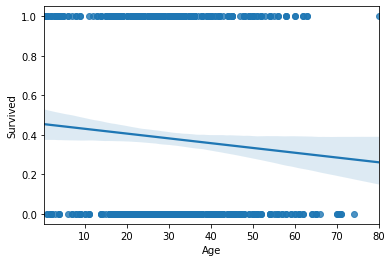

In [5]:
#features extraction
x = data[['Age','Sex']]
y = data['Survived']

#Data splitting
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)  #splitting data with test size of 30%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance

sns.regplot(x='Age',y='Survived',data=data)
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

this model is 81% accuracte which is good but we must look deaper and figure out ,
that is why we must use confusion matrix to validate our model

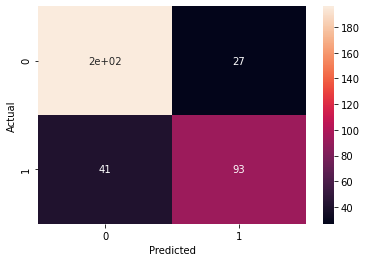

In [11]:
#This is what a confusion matrix look like :

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [12]:
from sklearn.metrics import classification_report
#Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       223
           1       0.78      0.69      0.73       134

    accuracy                           0.81       357
   macro avg       0.80      0.79      0.79       357
weighted avg       0.81      0.81      0.81       357



In [13]:
#ROC / AUC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ROC : ROC is a trade-off between True Positive Rate(How much correctly classified as 1) and False Positive Rate (How much incorrectly classified as 1)

AUC : AUC is the Area Under the Curve in the ROC plot which has to be measured and analyzed. AUC=1 means all positive examples come after your negative example. AUC = 0 means all negative examples come after your positive example. AUC=0.5 means a random classifier

In [14]:
#calculate AUC

auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.786


An area of 0.7 is good. The closer the AUC to 1 the betterfor our model , Higher the AUC, better the model is 


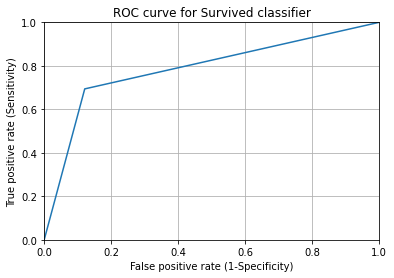

In [15]:
#calculate RUC

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Survived classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

A model with good classification accuracy should have significantly more true positives than false positives at all thresholds.

The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels